<a href="https://colab.research.google.com/github/BrianWu1010/ToolNet-Mechanical-Tool-Classifier-with-PyTorch/blob/main/ToolNet_Mechanical_Tool_Classifier_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: PyTorch Basics

## Overview

In this assignment, you will:
1. Build a simple neural network from scratch to understand how neural networks work.
2. Train a neural network (using PyTorch) to classify images from the Mechanical Tools Classification dataset into one of 8 classes (hammer, wrench, pliers, etc.).

The provided code will guide you through key steps, but by the end of the assignment, you should:

1. Understand the training loop for a machine learning model.
2. Distinguish between training, validation, and test data.
3. Learn about overfitting and underfitting.
4. Explore how hyperparameters, like learning rate and batch size, impact training.
5. Compare a basic feedforward neural network (ANN) with a convolutional neural network (CNN).

This assignment is inspired by materials developed by Prof. Lisa Zhang.


## What to Submit

1. Submit the `.ipynb` and `.html` files containing your code, outputs, and answers from all parts. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

  You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.


2. Submit your model predictions on the secret test dataset for Parts B-5 and B-6 as `labels_part5.csv` and `labels_part6.csv`.

**Important**: Do not submit additional files generated by your code.

Please use Google Colab for this assignment. If you prefer Jupyter Notebook, ensure the file is uploaded to Colab for submission.


## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED

https://colab.research.google.com/drive/1sNdGRqweQQWfvnyMaAjxh1GbaphA3wQz?authuser=1#scrollTo=bd1264a4

SyntaxError: invalid decimal literal (<ipython-input-1-1ca4758ece44>, line 3)

# PART A: Building a Neural Network from Scratch [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:


In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [ ]:
import numpy as np
# raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Part A-1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  # softmax
  y_pred = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  error = -np.mean(np.sum(y_train * np.log(y_pred + 1e-9), axis=1))

  #initialize gradients to zero
  dw0 = np.zeros_like(w0)
  dw1 = np.zeros_like(w1)

  #calculate gradients
  d_layer2 = y_pred - y_train
  d_layer1 = np.dot(d_layer2, w1.T) * layer1 * (1 - layer1)

  #determine gradients
  dw1 += np.dot(layer1.T, d_layer2)
  dw0 += np.dot(layer0.T, d_layer1)

  #combine gradients into one vector
  dW = np.concatenate((dw0.flatten(), dw1.flatten()))

  return (error, dW, y_pred)


## Part A-2. Train your neural network [1pt RESULT]
How well does your network work on the iris dataset?

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)

In [ ]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The predicted results matches perfectly with the ground truth training data, means the network is working well on the iris dataset.





'''

'\nPROVIDE YOUR ANSWER BELOW\n\nThe predicted results matches perfectly with the ground truth training data, means the network is working well on the iris dataset.\n\n\n\n\n\n'

## Part A-3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  We1[ind] += 1e-5
  We2[ind] -= 1e-5

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1 - error_e2)/(2*1e-5)

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0872 -0.0008808366924739629 -0.08808366907012702
2.1641 -0.02185940957133425 -2.1859409691329477
0.5017 -0.0050676893459389305 -0.5067689356135979
3.4221 -0.034566737783237045 -3.456673799199556
0.012 -0.00012120987546992977 -0.01212098784192194
0.0487 -0.0004919266993752558 -0.0491926700154492
1.2977 0.013107843577220278 1.3107843606448062
0.1447 -0.0014613706578181505 -0.14613706609245067
0.4614 0.004660173502646359 0.46601734773261
0.0134 -0.00013514818153481656 -0.013514817544155289
0.0416 -0.00042018618584549467 -0.04201861834160121
6.3452 -0.06409291722908605 -6.409291744706485
0.6067 -0.006128270324534667 -0.6128270318652012
6.3254 -0.06389339431978058 -6.389339458696442
0.0071 7.201893525987657e-05 0.007201893021010687
0.0097 -9.82903980428773e-05 -0.009829039165764657
2.5856 -0.026116710294399322 -2.611671039176958
0.2426 -0.0024507571083631774 -0.24507571201397194
2.3336 -0.023571287122159387 -2.3571287227219355
0.0039 3.9452374700488235e-05 0.003945237711838384
0.0289 -0.0

# PART B: Training with PyTorch

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify different Mechanical Tools.


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

## Part B-0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    classes = dataset.classes  # Get class names

    # Split the dataset
    total_size = len(dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Valid from remaining
    train_size = total_size - test_size - valid_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Normalize labels for multi-class classification.

    Args:
        labels: A 1D tensor of scalar class labels.
    Returns:
        The same labels (already suitable for multi-class classification).
    """
    return labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on a given dataset.

     Args:
         net: PyTorch neural network object.
         loader: PyTorch DataLoader for valuation data.
         criterion: The loss function.

     Returns:
         err: Average classification error rate over the validation set.
         loss: Average loss value over the validation set.
    """
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Compute classification error
            _, predicted = torch.max(outputs, 1)
            total_err += (predicted != labels).sum().item()
            total_loss += loss.item()
            total_samples += len(labels)

    err = total_err / total_samples
    avg_loss = total_loss / len(loader)
    return err, avg_loss

###############################################################################
# Training Curve

def plot_training_curve(path):
    """ Plot training and validation error/loss curves.

    Args:
        path: Base path for the CSV files containing training logs.
    """
    import matplotlib.pyplot as plt

    train_err = np.loadtxt(f"{path}_train_err.csv")
    val_err = np.loadtxt(f"{path}_val_err.csv")
    train_loss = np.loadtxt(f"{path}_train_loss.csv")
    val_loss = np.loadtxt(f"{path}_val_loss.csv")

    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(range(1, len(train_err) + 1), train_err, label="Train")
    plt.plot(range(1, len(val_err) + 1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


## Part B-1. Visualizing the Data

We will make use of the Mechanical Tools dataset, which consists of
color images of various mechanical tools such as hammers, wrenches,
screwdrivers, and more. These images are resized to 128x128 pixels.
You can find the dataset at https://www.kaggle.com/datasets/salmaneunus/mechanical-tools-dataset

Download the "mechanical_tools.zip" file from Quercus and upload it to your colab session storage.
Run the provided code to automatically unzip the dataset  and split the dataset into
training, validation, and testing sets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
_ = !unzip "/content/drive/MyDrive/Intro to Deep Learning/mechanical_tools.zip" -d "/content/mechanical_tools/"

In [ ]:
# Load the Mechanical Tools Dataset
data_dir = "./mechanical_tools/mechanical_tools"  # Path to the dataset directory
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir, batch_size=batch_size
)

### Part B-1(i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

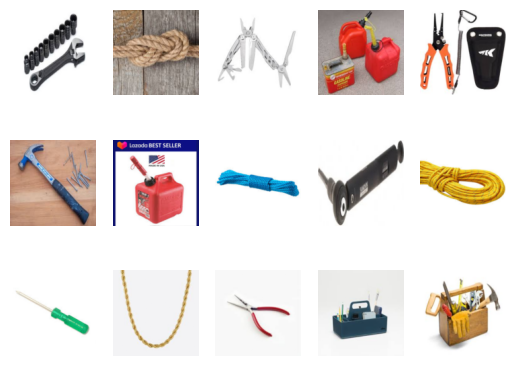

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

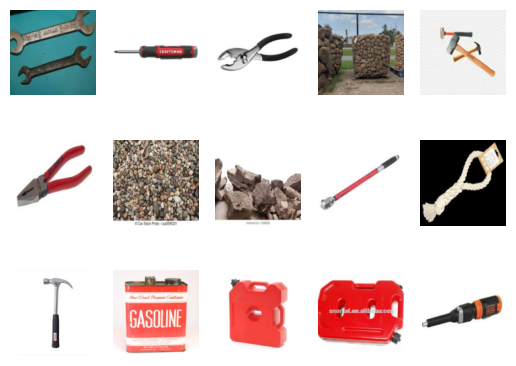

### Part B-1(ii) [1pt EXPLORATORY]

How many training examples do we have for the combined classes?
What about validation examples?
What about test examples?

In [ ]:
num_train = len(train_loader.dataset)
num_val = len(val_loader.dataset)
num_test = len(test_loader.dataset)

print (f"Number of training examples: {num_train}")
print (f"Number of validation examples: {num_val}")
print (f"Number of test examples: {num_test}")



Number of training examples: 1152
Number of validation examples: 288
Number of test examples: 160


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW




'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n'

Number of training examples: 1152 \\
Number of validation examples: 288 \\
Number of test examples: 160

## Part B-2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 29 * 29, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 29 * 29)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 31 * 31, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 31 * 31)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part B-2(i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [ ]:
 for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([8, 4805])
torch.Size([8])


In [ ]:
total_params_small_net = 0
for param in small_net.parameters():
  print(f"Shape: {param.shape}, Total Elements: {param.numel()}")
  total_params_small_net += param.numel()

print(f"Total number of parameters in small_net: {total_params_small_net}")

total_params_large_net = 0
for param in large_net.parameters():
    print(f"Shape: {param.shape}, Total Elements: {param.numel()}")
    total_params_large_net += param.numel()

print(f"Total number of parameters in large_net: {total_params_large_net}")

Shape: torch.Size([5, 3, 3, 3]), Total Elements: 135
Shape: torch.Size([5]), Total Elements: 5
Shape: torch.Size([8, 4805]), Total Elements: 38440
Shape: torch.Size([8]), Total Elements: 8
Total number of parameters in small_net: 38588
Shape: torch.Size([5, 3, 5, 5]), Total Elements: 375
Shape: torch.Size([5]), Total Elements: 5
Shape: torch.Size([10, 5, 5, 5]), Total Elements: 1250
Shape: torch.Size([10]), Total Elements: 10
Shape: torch.Size([32, 8410]), Total Elements: 269120
Shape: torch.Size([32]), Total Elements: 32
Shape: torch.Size([8, 32]), Total Elements: 256
Shape: torch.Size([8]), Total Elements: 8
Total number of parameters in large_net: 271056


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

Shape: torch.Size([5, 3, 3, 3]), Total Elements: 135 \\
Shape: torch.Size([5]), Total Elements: 5 \\
Shape: torch.Size([8, 4805]), Total Elements: 38440 \\
Shape: torch.Size([8]), Total Elements: 8 \\
Total number of parameters in small_net: 38588 \\
Shape: torch.Size([5, 3, 5, 5]), Total Elements: 375 \\
Shape: torch.Size([5]), Total Elements: 5 \\
Shape: torch.Size([10, 5, 5, 5]), Total Elements: 1250 \\
Shape: torch.Size([10]), Total Elements: 10 \\
Shape: torch.Size([32, 8410]), Total Elements: 269120 \\
Shape: torch.Size([32]), Total Elements: 32 \\
Shape: torch.Size([8, 32]), Total Elements: 256 \\
Shape: torch.Size([8]), Total Elements: 8 \\
Total number of parameters in large_net: 271056 \\

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 8-class classification problem
    target_classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools',  # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 8, "The dataset should have exactly 8 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


### Part B-2(ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

The default values for the parameters batch_size, learning_rate, and num_epochs in the function train_net are defined in its function signature:

def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):

### Part B-2(iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

# **List of all files written during the training of small_net for 5 epochs:**

**Model Checkpoints (5 files):**

small_net_bs64_lr0.01_epoch0.pth

small_net_bs64_lr0.01_epoch1.pth

small_net_bs64_lr0.01_epoch2.pth

small_net_bs64_lr0.01_epoch3.pth

small_net_bs64_lr0.01_epoch4.pth

**Training and Validation Metrics (4 files):**

small_net_bs64_lr0.01_epoch4_train_err.csv

small_net_bs64_lr0.01_epoch4_train_loss.csv

small_net_bs64_lr0.01_epoch4_val_err.csv

small_net_bs64_lr0.01_epoch4_val_loss.csv \\


# **What Each File Contains**

**Model Checkpoints (*.pth):**

Trainable parameters (weights and biases) of the network at each epoch.

**Training Metrics (*_train_err.csv and *_train_loss.csv): ***

Training error: Fraction of incorrect predictions during training.

Training loss: Average loss during training.

**Validation Metrics (*_val_err.csv and *_val_loss.csv):**

Validation error: Fraction of incorrect predictions during validation.

Validation loss: Average loss during validation.

### Part B-2(iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Train small_net
print("Training small_net...")
start_time_small = time.time()
train_net(small_net)
end_time_small = time.time()
elapsed_time_small = end_time_small - start_time_small
print(f"Total time elapsed for training small_net: {elapsed_time_small:.2f} seconds")

# Train large_net
print("Training large_net...")
start_time_large = time.time()
train_net(large_net)
end_time_large = time.time()
elapsed_time_large = end_time_large - start_time_large
print(f"Total time elapsed for training large_net: {elapsed_time_large:.2f} seconds")


Training small_net...
Epoch 1: Train err: 0.7292, Train loss: 1.8731 | Validation err: 0.6424, Validation loss: 1.7023
Epoch 2: Train err: 0.5747, Train loss: 1.4980 | Validation err: 0.6215, Validation loss: 1.6072
Epoch 3: Train err: 0.4627, Train loss: 1.3305 | Validation err: 0.5833, Validation loss: 1.5745
Epoch 4: Train err: 0.3967, Train loss: 1.1419 | Validation err: 0.5139, Validation loss: 1.4903
Epoch 5: Train err: 0.3299, Train loss: 0.9518 | Validation err: 0.5312, Validation loss: 1.6536
Epoch 6: Train err: 0.3056, Train loss: 0.8848 | Validation err: 0.5556, Validation loss: 1.8646
Epoch 7: Train err: 0.2153, Train loss: 0.7022 | Validation err: 0.5590, Validation loss: 1.7411
Epoch 8: Train err: 0.1519, Train loss: 0.5270 | Validation err: 0.5104, Validation loss: 2.0364
Epoch 9: Train err: 0.1181, Train loss: 0.4137 | Validation err: 0.5556, Validation loss: 2.1536
Epoch 10: Train err: 0.0903, Train loss: 0.3322 | Validation err: 0.5312, Validation loss: 2.1865
Epoch 1

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

Training small_net...

Epoch 1: Train err: 0.7214, Train loss: 1.8620 | Validation err: 0.6701, Validation loss: 1.7330
Epoch 2: Train err: 0.5495, Train loss: 1.5197 | Validation err: 0.6667, Validation loss: 1.6670
Epoch 3: Train err: 0.4878, Train loss: 1.3702 | Validation err: 0.5903, Validation loss: 1.5425
Epoch 4: Train err: 0.4080, Train loss: 1.1703 | Validation err: 0.5243, Validation loss: 1.4903
Epoch 5: Train err: 0.3628, Train loss: 1.0158 | Validation err: 0.5451, Validation loss: 1.5859
Epoch 6: Train err: 0.2830, Train loss: 0.8749 | Validation err: 0.5521, Validation loss: 1.6261
Epoch 7: Train err: 0.2179, Train loss: 0.7222 | Validation err: 0.5347, Validation loss: 1.7180
Epoch 8: Train err: 0.1675, Train loss: 0.5655 | Validation err: 0.5208, Validation loss: 1.9209
Epoch 9: Train err: 0.1432, Train loss: 0.4749 | Validation err: 0.5382, Validation loss: 2.0955
Epoch 10: Train err: 0.1085, Train loss: 0.3636 | Validation err: 0.5208, Validation loss: 2.1283
Epoch 11: Train err: 0.0651, Train loss: 0.2661 | Validation err: 0.5833, Validation loss: 2.5433
Epoch 12: Train err: 0.0495, Train loss: 0.2221 | Validation err: 0.5868, Validation loss: 2.3058
Epoch 13: Train err: 0.0365, Train loss: 0.1668 | Validation err: 0.5521, Validation loss: 2.5294
Epoch 14: Train err: 0.0156, Train loss: 0.1128 | Validation err: 0.5521, Validation loss: 2.5641
Epoch 15: Train err: 0.0130, Train loss: 0.0889 | Validation err: 0.5451, Validation loss: 2.6331
Epoch 16: Train err: 0.0061, Train loss: 0.0695 | Validation err: 0.5556, Validation loss: 2.7828
Epoch 17: Train err: 0.0000, Train loss: 0.0544 | Validation err: 0.5556, Validation loss: 2.8920
Epoch 18: Train err: 0.0035, Train loss: 0.0463 | Validation err: 0.5486, Validation loss: 2.9352
Epoch 19: Train err: 0.0017, Train loss: 0.0390 | Validation err: 0.5521, Validation loss: 3.0020
Epoch 20: Train err: 0.0017, Train loss: 0.0357 | Validation err: 0.5556, Validation loss: 3.0761
Epoch 21: Train err: 0.0009, Train loss: 0.0318 | Validation err: 0.5451, Validation loss: 3.1259
Epoch 22: Train err: 0.0009, Train loss: 0.0260 | Validation err: 0.5486, Validation loss: 3.1896
Epoch 23: Train err: 0.0009, Train loss: 0.0230 | Validation err: 0.5590, Validation loss: 3.2254
Epoch 24: Train err: 0.0009, Train loss: 0.0226 | Validation err: 0.5625, Validation loss: 3.3174
Epoch 25: Train err: 0.0009, Train loss: 0.0222 | Validation err: 0.5556, Validation loss: 3.2927
Epoch 26: Train err: 0.0009, Train loss: 0.0181 | Validation err: 0.5660, Validation loss: 3.3883
Epoch 27: Train err: 0.0009, Train loss: 0.0189 | Validation err: 0.5556, Validation loss: 3.4494
Epoch 28: Train err: 0.0017, Train loss: 0.0190 | Validation err: 0.5694, Validation loss: 3.3868
Epoch 29: Train err: 0.0009, Train loss: 0.0150 | Validation err: 0.5694, Validation loss: 3.4426
Epoch 30: Train err: 0.0009, Train loss: 0.0167 | Validation err: 0.5625, Validation loss: 3.5937


Finished Training
Total time elapsed: 169.88 seconds
Total time elapsed for training small_net: 169.90 seconds


Training large_net...

Epoch 1: Train err: 0.8507, Train loss: 2.0168 | Validation err: 0.7049, Validation loss: 1.8958
Epoch 2: Train err: 0.6849, Train loss: 1.7746 | Validation err: 0.7049, Validation loss: 1.8447
Epoch 3: Train err: 0.6458, Train loss: 1.6916 | Validation err: 0.6597, Validation loss: 1.7242
Epoch 4: Train err: 0.6059, Train loss: 1.5970 | Validation err: 0.6458, Validation loss: 1.6696
Epoch 5: Train err: 0.5538, Train loss: 1.5066 | Validation err: 0.6250, Validation loss: 1.6394
Epoch 6: Train err: 0.5399, Train loss: 1.4383 | Validation err: 0.5660, Validation loss: 1.6087
Epoch 7: Train err: 0.4931, Train loss: 1.3861 | Validation err: 0.5521, Validation loss: 1.5418
Epoch 8: Train err: 0.4861, Train loss: 1.2862 | Validation err: 0.5972, Validation loss: 1.6392
Epoch 9: Train err: 0.4679, Train loss: 1.2452 | Validation err: 0.6007, Validation loss: 1.6605
Epoch 10: Train err: 0.4705, Train loss: 1.2590 | Validation err: 0.5521, Validation loss: 1.6339
Epoch 11: Train err: 0.3976, Train loss: 1.0647 | Validation err: 0.5243, Validation loss: 1.7749
Epoch 12: Train err: 0.3056, Train loss: 0.8769 | Validation err: 0.5521, Validation loss: 1.8405
Epoch 13: Train err: 0.2543, Train loss: 0.7093 | Validation err: 0.5625, Validation loss: 2.0635
Epoch 14: Train err: 0.2335, Train loss: 0.6556 | Validation err: 0.5799, Validation loss: 2.5121
Epoch 15: Train err: 0.2222, Train loss: 0.6166 | Validation err: 0.5590, Validation loss: 2.7684
Epoch 16: Train err: 0.1432, Train loss: 0.3843 | Validation err: 0.5799, Validation loss: 2.8328
Epoch 17: Train err: 0.0833, Train loss: 0.2755 | Validation err: 0.5868, Validation loss: 3.5773
Epoch 18: Train err: 0.0998, Train loss: 0.2872 | Validation err: 0.5833, Validation loss: 3.4297
Epoch 19: Train err: 0.0451, Train loss: 0.1486 | Validation err: 0.5660, Validation loss: 3.8830
Epoch 20: Train err: 0.0269, Train loss: 0.0879 | Validation err: 0.5938, Validation loss: 4.4315
Epoch 21: Train err: 0.0321, Train loss: 0.1100 | Validation err: 0.5903, Validation loss: 4.6660
Epoch 22: Train err: 0.0200, Train loss: 0.0594 | Validation err: 0.5833, Validation loss: 4.6899
Epoch 23: Train err: 0.0156, Train loss: 0.0498 | Validation err: 0.6007, Validation loss: 5.6148
Epoch 24: Train err: 0.0182, Train loss: 0.0641 | Validation err: 0.5729, Validation loss: 5.0537
Epoch 25: Train err: 0.0122, Train loss: 0.0486 | Validation err: 0.5972, Validation loss: 5.1323
Epoch 26: Train err: 0.0069, Train loss: 0.0253 | Validation err: 0.5729, Validation loss: 5.7823
Epoch 27: Train err: 0.0260, Train loss: 0.0868 | Validation err: 0.5903, Validation loss: 5.2471
Epoch 28: Train err: 0.0330, Train loss: 0.1237 | Validation err: 0.5903, Validation loss: 4.6834
Epoch 29: Train err: 0.0278, Train loss: 0.1194 | Validation err: 0.5903, Validation loss: 5.3102
Epoch 30: Train err: 0.0191, Train loss: 0.0649 | Validation err: 0.5972, Validation loss: 5.6280


Finished Training
Total time elapsed: 248.18 seconds
Total time elapsed for training large_net: 248.20 seconds


large_net took longer to train.

1. More Parameters: large_net has more layers or neurons, resulting in a higher number of trainable parameters compared to small_net. This increases the computational workload during forward and backward passes.

2. Increased Computational Complexity: Larger networks require more matrix multiplications and gradient calculations, which take more time.


3. Memory Requirements: large_net likely uses more memory, making updates and processing slower.

In short, large_net is more complex and requires more computation, leading to a longer training time.

### Part B-2(v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

In [ ]:
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)

In [ ]:
import os

# List files in the directory where the files are expected to be saved
files = os.listdir('.')
print(files)


['.config', 'model_small_bs64_lr0.01_epoch8', 'model_large_bs64_lr0.01_epoch8', 'model_small_bs64_lr0.01_epoch23', 'model_large_bs64_lr0.01_epoch29_train_err.csv', 'model_small_bs64_lr0.01_epoch29_train_loss.csv', 'model_small_bs64_lr0.01_epoch19', 'model_small_bs64_lr0.01_epoch29_val_loss.csv', 'model_large_bs64_lr0.01_epoch29', 'model_large_bs64_lr0.01_epoch2', 'model_large_bs64_lr0.01_epoch17', 'model_large_bs64_lr0.01_epoch0', 'model_large_bs64_lr0.01_epoch19', 'model_small_bs64_lr0.01_epoch29', 'model_small_bs64_lr0.01_epoch18', 'model_large_bs64_lr0.01_epoch5', 'model_large_bs64_lr0.01_epoch6', 'model_small_bs64_lr0.01_epoch9', 'model_small_bs64_lr0.01_epoch13', 'model_large_bs64_lr0.01_epoch26', 'model_small_bs64_lr0.01_epoch24', 'model_small_bs64_lr0.01_epoch26', 'mechanical_tools', 'model_large_bs64_lr0.01_epoch3', 'model_large_bs64_lr0.01_epoch7', 'model_large_bs64_lr0.01_epoch22', 'model_small_bs64_lr0.01_epoch17', 'model_small_bs64_lr0.01_epoch0', 'model_large_bs64_lr0.01_e

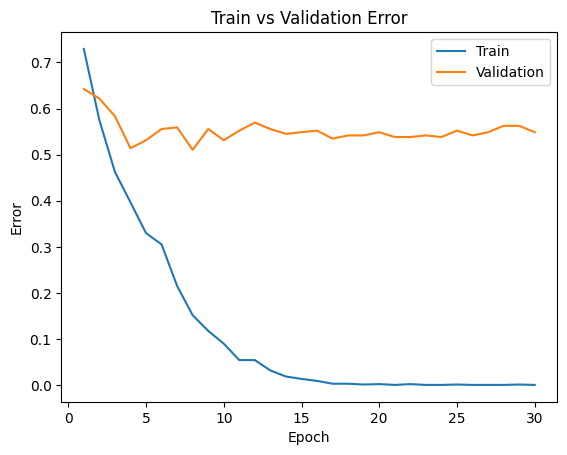

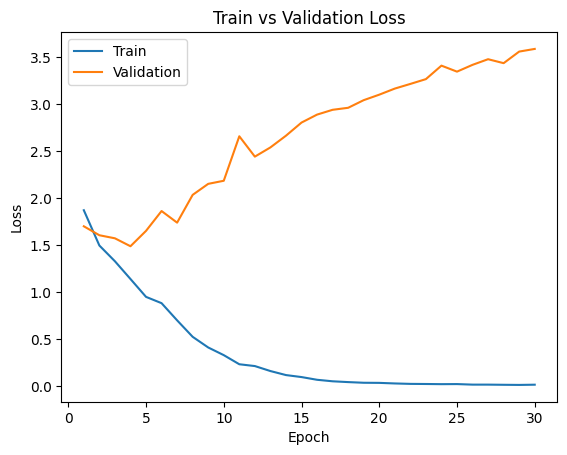

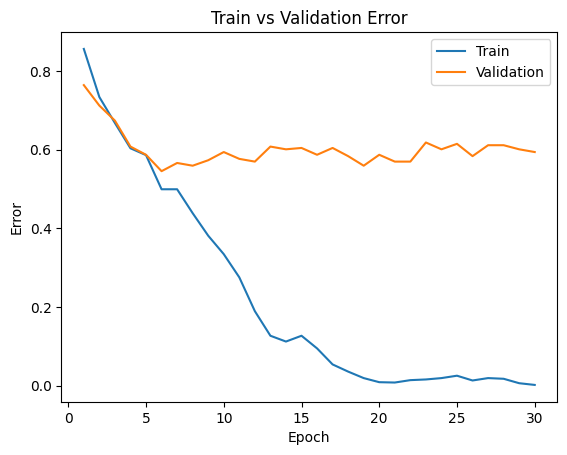

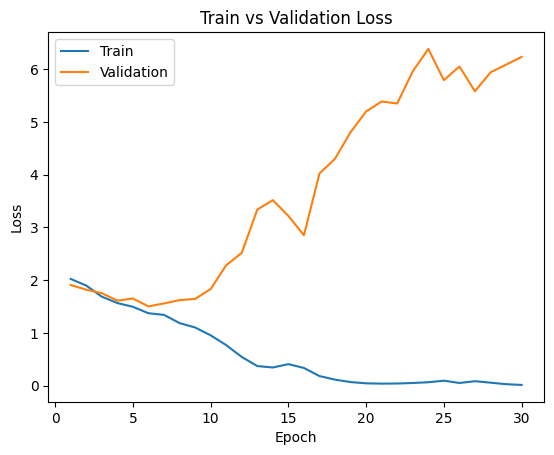

In [ ]:
# Plot the training/validation curves for small_net
small_net_model_name = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)  # 29 because we want the final model
plot_training_curve(small_net_model_name)

# Plot the training/validation curves for large_net
large_net_model_name = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)  # 29 because we want the final model
plot_training_curve(large_net_model_name)





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

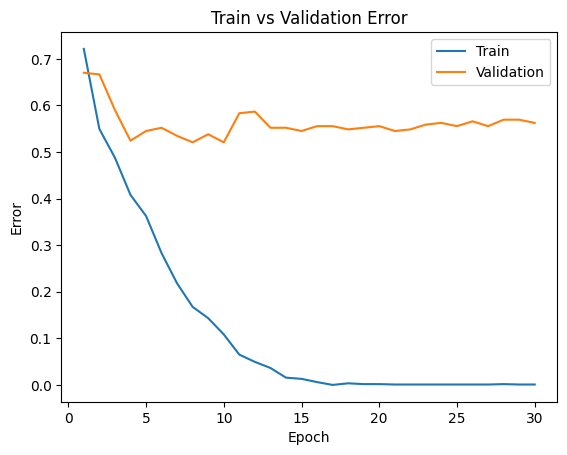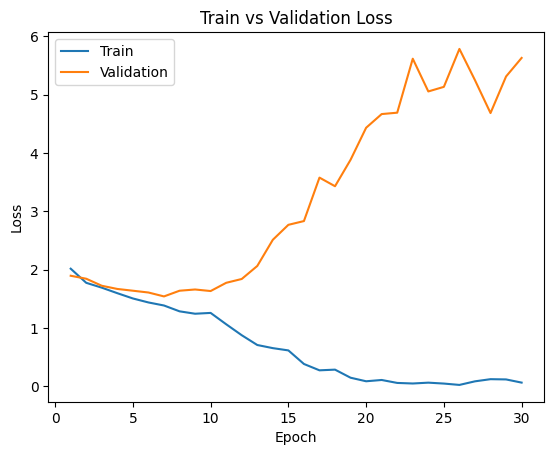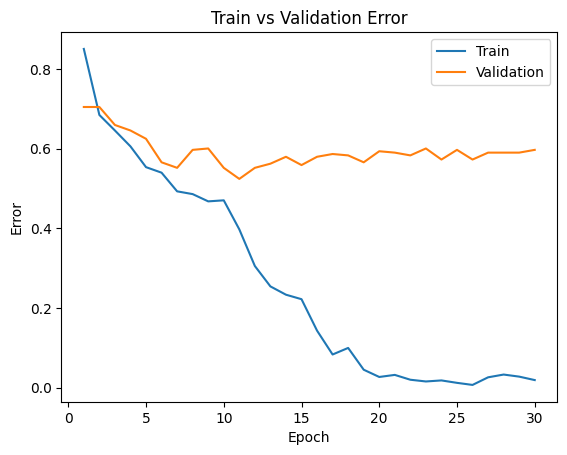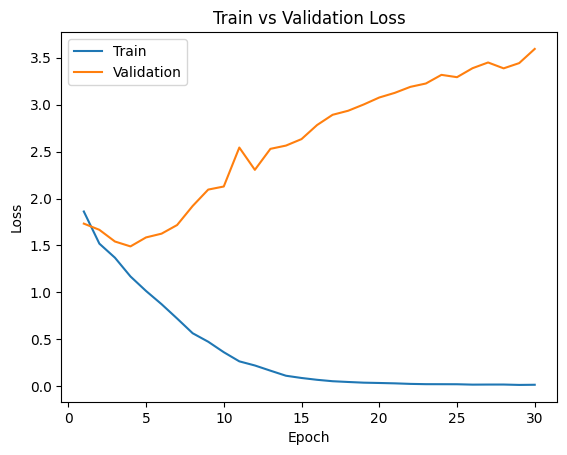

### Part B-2(vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

The training loss and error decrease steadily for both small_net and large_net, while the validation loss initially decreases but later increases.

small_net has a lower validation loss compared to large_net, which shows a sharper rise in validation loss after ~10 epochs, indicating more severe overfitting.

large_net overfits significantly as its validation loss increases rapidly, and validation error fluctuates. small_net also overfits but to a lesser extent.

No clear signs of underfitting, as both models show decreasing training loss and error.

## Part B-3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part B-3(i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

In [ ]:
# Train large_net with lower learning rate
print("Training large_net with learning_rate=0.001...")
start_time = time.time()
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (lr=0.001): {elapsed_time:.2f} seconds")


Training large_net with learning_rate=0.001...
Epoch 1: Train err: 0.8663, Train loss: 2.0815 | Validation err: 0.8854, Validation loss: 2.0806
Epoch 2: Train err: 0.8646, Train loss: 2.0734 | Validation err: 0.8889, Validation loss: 2.0713
Epoch 3: Train err: 0.8585, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0555
Epoch 4: Train err: 0.8542, Train loss: 2.0413 | Validation err: 0.8507, Validation loss: 2.0274
Epoch 5: Train err: 0.8351, Train loss: 2.0078 | Validation err: 0.8090, Validation loss: 1.9891
Epoch 6: Train err: 0.7882, Train loss: 1.9660 | Validation err: 0.7882, Validation loss: 1.9591
Epoch 7: Train err: 0.7491, Train loss: 1.9279 | Validation err: 0.7500, Validation loss: 1.9329
Epoch 8: Train err: 0.7370, Train loss: 1.8896 | Validation err: 0.7153, Validation loss: 1.9140
Epoch 9: Train err: 0.6875, Train loss: 1.8410 | Validation err: 0.6944, Validation loss: 1.8694
Epoch 10: Train err: 0.6398, Train loss: 1.7727 | Validation err: 0.6840, Valida

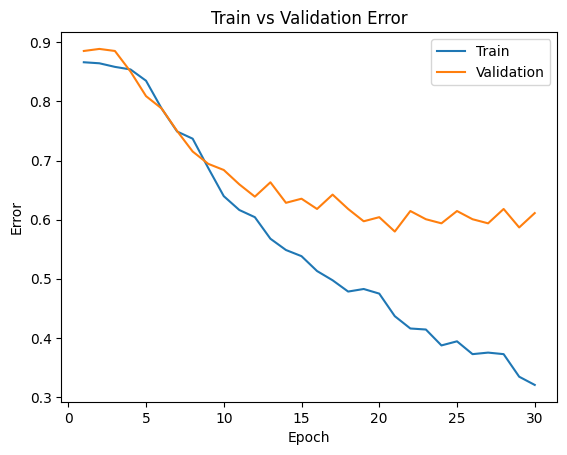

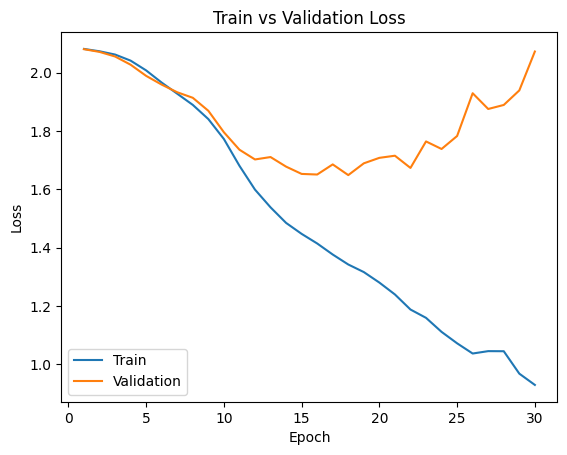

In [ ]:
# Generate the model name based on the new learning rate
large_net_model_name = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)

# Plot the training curve
plot_training_curve(large_net_model_name)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

**Does the model take longer or shorter to train?**

The model takes a similar amount of time per epoch, but it converges more slowly because the smaller learning rate results in smaller updates to the weights.
This means that while each epoch takes the same time, more epochs may be needed to reach the same performance level as before.

**Plot the training curve: 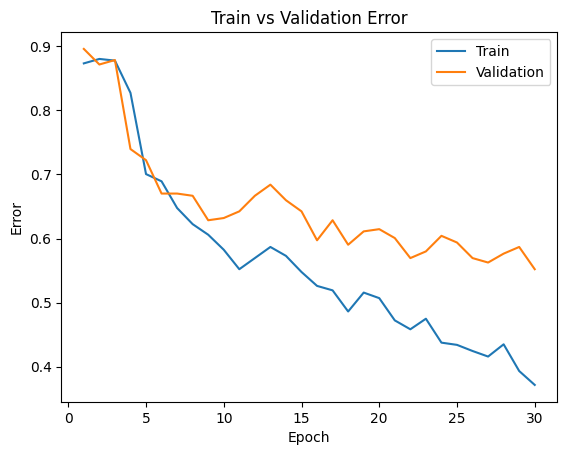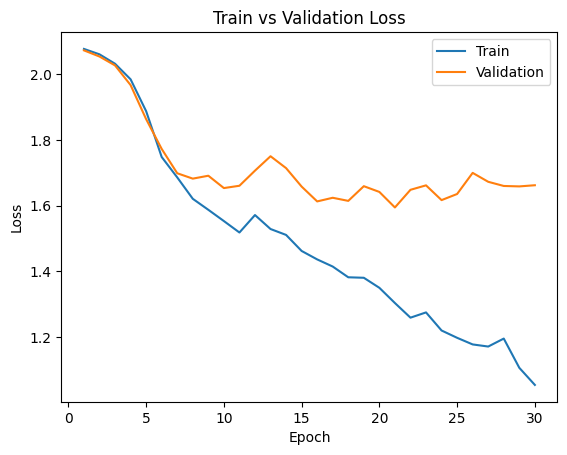**

**Describe the effect of lowering the learning rate:**

Slower convergence: The training loss decreases more gradually compared to a higher learning rate.

Better generalization: The validation loss remains more stable and does not increase sharply, indicating reduced overfitting.

Higher validation performance: Unlike before, the validation error does not diverge as much from the training error, suggesting improved generalization.

Overall, lowering the learning rate leads to slower but steadier learning, reducing overfitting but requiring more epochs to reach optimal performance.

### Part B-3(ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

In [ ]:
# Re-initialize large_net with random weights
large_net = LargeNet()

# Train large_net with higher learning rate
print("Training large_net with learning_rate=0.1...")
start_time = time.time()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (lr=0.1): {elapsed_time:.2f} seconds")


Training large_net with learning_rate=0.1...
Epoch 1: Train err: 0.8325, Train loss: 2.0075 | Validation err: 0.8264, Validation loss: 2.0185
Epoch 2: Train err: 0.7387, Train loss: 1.8580 | Validation err: 0.7847, Validation loss: 2.1158
Epoch 3: Train err: 0.8108, Train loss: 2.0193 | Validation err: 0.8299, Validation loss: 1.9744
Epoch 4: Train err: 0.7587, Train loss: 1.8619 | Validation err: 0.7743, Validation loss: 1.9803
Epoch 5: Train err: 0.6832, Train loss: 1.8327 | Validation err: 0.7465, Validation loss: 1.9282
Epoch 6: Train err: 0.6658, Train loss: 1.7069 | Validation err: 0.7569, Validation loss: 2.0031
Epoch 7: Train err: 0.5625, Train loss: 1.5141 | Validation err: 0.8090, Validation loss: 2.0594
Epoch 8: Train err: 0.4965, Train loss: 1.3541 | Validation err: 0.7743, Validation loss: 2.3331
Epoch 9: Train err: 0.4340, Train loss: 1.2186 | Validation err: 0.7743, Validation loss: 2.6937
Epoch 10: Train err: 0.3550, Train loss: 1.0587 | Validation err: 0.7326, Validati

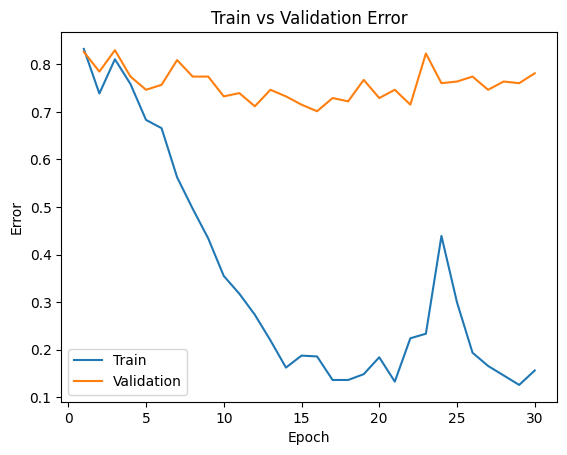

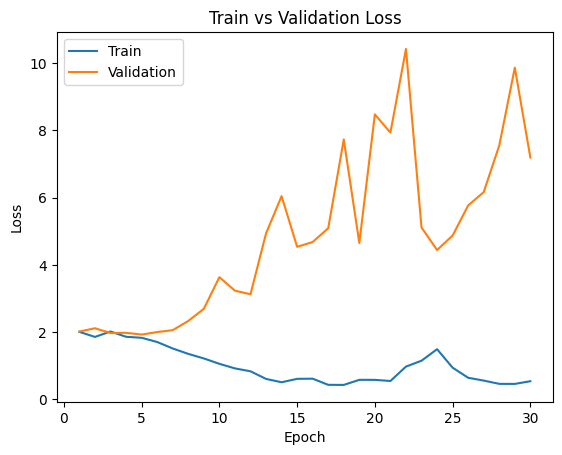

In [ ]:
# Generate the model name based on the new learning rate
large_net_model_name = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)

# Plot the training curve
plot_training_curve(large_net_model_name)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW




'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n'

The model takes the same amount of time per epoch, but with a high learning rate of 0.1, it appears to converge very quickly within the first few epochs. However, the training and validation loss stagnate, suggesting that the model is not effectively learning beyond the initial phase. The validation error fluctuates significantly, indicating unstable training.

Increasing the learning rate leads to rapid but unstable updates, preventing the model from finding an optimal solution. The model fails to generalize well, as seen from the inconsistent validation performance. A lower learning rate (e.g., 0.01 or 0.001) would help the model converge more gradually and improve stability.

### Part B-3(iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

In [ ]:
# Re-initialize large_net with random weights
large_net = LargeNet()

# Train large_net with a larger batch size
print("Training large_net with batch_size=512...")
start_time = time.time()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (batch_size=512): {elapsed_time:.2f} seconds")


Training large_net with batch_size=512...
Epoch 1: Train err: 0.8594, Train loss: 2.0847 | Validation err: 0.8889, Validation loss: 2.0832
Epoch 2: Train err: 0.8655, Train loss: 2.0756 | Validation err: 0.8889, Validation loss: 2.0775
Epoch 3: Train err: 0.8533, Train loss: 2.0697 | Validation err: 0.8507, Validation loss: 2.0703
Epoch 4: Train err: 0.8307, Train loss: 2.0622 | Validation err: 0.8542, Validation loss: 2.0582
Epoch 5: Train err: 0.8273, Train loss: 2.0521 | Validation err: 0.8333, Validation loss: 2.0364
Epoch 6: Train err: 0.8194, Train loss: 2.0163 | Validation err: 0.8090, Validation loss: 2.0029
Epoch 7: Train err: 0.7969, Train loss: 1.9971 | Validation err: 0.7674, Validation loss: 1.9746
Epoch 8: Train err: 0.7682, Train loss: 1.9531 | Validation err: 0.7708, Validation loss: 1.9606
Epoch 9: Train err: 0.7613, Train loss: 1.9372 | Validation err: 0.7535, Validation loss: 1.9476
Epoch 10: Train err: 0.7240, Train loss: 1.8825 | Validation err: 0.7083, Validation 

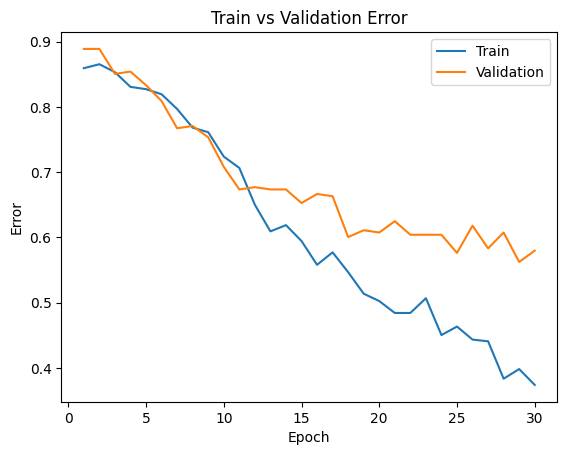

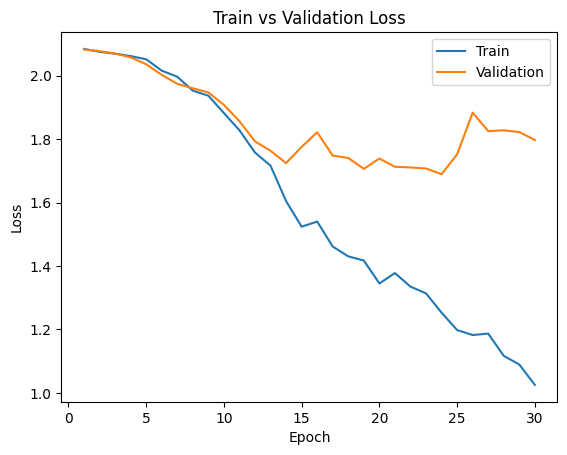

In [ ]:
# Generate the model name based on the new batch size
large_net_model_name = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)

# Plot the training curve
plot_training_curve(large_net_model_name)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

The model trains faster per epoch because it processes fewer but larger batches, reducing the number of updates needed per cycle. However, since each update now represents a larger portion of the dataset, the model takes longer to converge, meaning it may require more epochs to reach optimal performance.

Increasing the batch size results in more stable training curves, as seen in the smoother loss and error trends. The larger batch size reduces the noise in gradient updates, leading to less variance between iterations. This helps the model generalize better, as the validation loss closely follows the training loss, indicating reduced overfitting.

However, with fewer updates per epoch, the model adapts more slowly, potentially requiring a greater number of epochs to reach the same level of accuracy as a smaller batch size. While stability is improved, the model may struggle to escape local minima as effectively as with smaller batch sizes, which introduce more randomness in the learning process.

### Part B-3(iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

In [ ]:
# Re-initialize large_net with random weights
large_net = LargeNet()

# Train large_net with a larger batch size
print("Training large_net with batch_size=512...")
start_time = time.time()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (batch_size=512): {elapsed_time:.2f} seconds")


Training large_net with batch_size=512...
Epoch 1: Train err: 0.7977, Train loss: 1.9847 | Validation err: 0.7674, Validation loss: 1.8954
Epoch 2: Train err: 0.6623, Train loss: 1.6986 | Validation err: 0.7500, Validation loss: 1.8516
Epoch 3: Train err: 0.6484, Train loss: 1.7502 | Validation err: 0.6701, Validation loss: 1.8281
Epoch 4: Train err: 0.6128, Train loss: 1.6916 | Validation err: 0.6424, Validation loss: 1.8220
Epoch 5: Train err: 0.5703, Train loss: 1.5606 | Validation err: 0.6771, Validation loss: 1.7367
Epoch 6: Train err: 0.5807, Train loss: 1.5651 | Validation err: 0.6424, Validation loss: 1.7965
Epoch 7: Train err: 0.5069, Train loss: 1.3991 | Validation err: 0.6597, Validation loss: 1.7051
Epoch 8: Train err: 0.4175, Train loss: 1.2058 | Validation err: 0.6146, Validation loss: 1.9790
Epoch 9: Train err: 0.3733, Train loss: 1.0768 | Validation err: 0.6562, Validation loss: 2.0212
Epoch 10: Train err: 0.3073, Train loss: 0.8358 | Validation err: 0.6354, Validation 

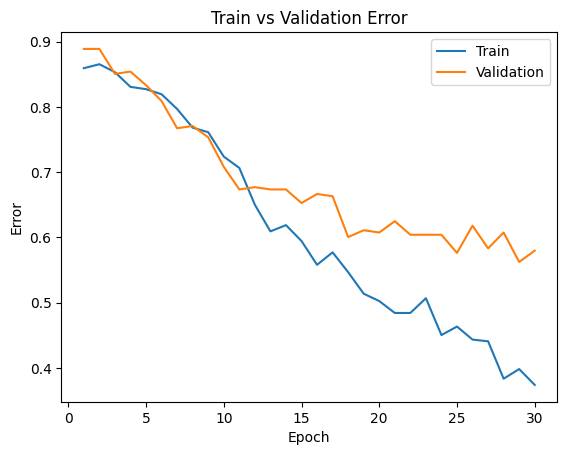

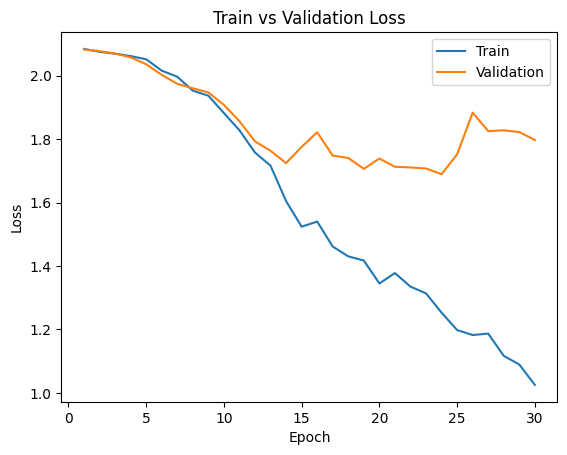

In [ ]:
# Generate the model name based on the new batch size
large_net_model_name = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)

# Plot the training curve
plot_training_curve(large_net_model_name)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

The model takes longer per epoch when using a smaller batch size of 16 because more batches need to be processed. However, since the model updates its weights more frequently, it may converge faster in terms of reducing loss, reaching lower values sooner compared to larger batch sizes. This makes training computationally more intensive but potentially more effective in adjusting to patterns in the data.  

With a smaller batch size, the training curves become noisier due to the increased variance in gradient updates. While this allows the model to escape sharp local minima and adapt faster, it can also lead to instability in learning. The validation loss may fluctuate more, reflecting inconsistent updates in the model's learning process, though it may still reach a lower final value if tuned properly.  

A key downside of smaller batch sizes is the increased risk of overfitting, as the model may adapt too well to the training data. While frequent updates improve learning, they can also cause the model to memorize patterns rather than generalize well to unseen data. To balance stability and performance, a moderate batch size (e.g., 32 or 64) might provide better results by smoothing the learning process while maintaining efficiency.

## Part B-4. Hyperparameter Search

### Part B-4(i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

I made these changes to improve training stability, speed up convergence, and reduce overfitting, while keeping large_net as the base model. The previous setup with batch_size=512 and learning_rate=0.01 had some drawbacks that could be addressed with better hyperparameter tuning.

First, I reduced the batch size from 512 to 128. A very large batch size like 512 results in fewer updates per epoch, which slows down convergence and makes the model less adaptable. A batch size of 128 strikes a balance between efficient computation and frequent weight updates, allowing for more updates per epoch while keeping training stable. The slight randomness introduced by a smaller batch size can also help the model escape local minima and generalize better.

Next, I lowered the learning rate from 0.01 to 0.005. A high learning rate with a large batch size can cause instability in training, leading to sharp fluctuations or even divergence. By using 0.005, we ensure that the model learns steadily and avoids overshooting, while still allowing it to converge within a reasonable number of epochs.

I also switched from SGD to Adam with L2 regularization. Adam dynamically adjusts the learning rate for each parameter, making training faster and more stable, especially with larger batch sizes. Additionally, L2 regularization (weight_decay=1e-4) helps prevent overfitting by discouraging excessively large weight values, leading to a more generalizable model.

To further prevent overfitting, I added dropout with p=0.3. Large networks like large_net tend to memorize training data, leading to poor validation performance. Dropout randomly disables neurons during training, forcing the model to learn more robust representations. This should improve validation accuracy and reduce the gap between training and validation loss.

Finally, I increased the number of epochs to 40 while recommending early stopping. With a lower learning rate, the model takes more epochs to fully learn, but early stopping ensures we don’t train longer than necessary if validation loss stops improving.

### Part B-4(ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

In [ ]:
# Re-initialize large_net with random weights
large_net = LargeNet()

# Use Adam optimizer with L2 regularization
optimizer = optim.Adam(large_net.parameters(), lr=0.005, weight_decay=1e-4)

# Train large_net with improved hyperparameters
print("Training large_net with batch_size=128 and learning_rate=0.005...")
start_time = time.time()
train_net(large_net, batch_size=128, learning_rate=0.005, num_epochs=40)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (batch_size=128): {elapsed_time:.2f} seconds")


Training large_net with batch_size=128 and learning_rate=0.005...
Epoch 1: Train err: 0.8715, Train loss: 2.0805 | Validation err: 0.8819, Validation loss: 2.0766
Epoch 2: Train err: 0.8585, Train loss: 2.0666 | Validation err: 0.8507, Validation loss: 2.0564
Epoch 3: Train err: 0.8307, Train loss: 2.0340 | Validation err: 0.8056, Validation loss: 2.0014
Epoch 4: Train err: 0.7865, Train loss: 1.9741 | Validation err: 0.7569, Validation loss: 1.9548
Epoch 5: Train err: 0.7309, Train loss: 1.9043 | Validation err: 0.6979, Validation loss: 1.9052
Epoch 6: Train err: 0.6866, Train loss: 1.8150 | Validation err: 0.6910, Validation loss: 1.7943
Epoch 7: Train err: 0.6146, Train loss: 1.6797 | Validation err: 0.6944, Validation loss: 1.6844
Epoch 8: Train err: 0.5946, Train loss: 1.5635 | Validation err: 0.6389, Validation loss: 1.7415
Epoch 9: Train err: 0.5833, Train loss: 1.5350 | Validation err: 0.6111, Validation loss: 1.7827
Epoch 10: Train err: 0.5660, Train loss: 1.4909 | Validation 

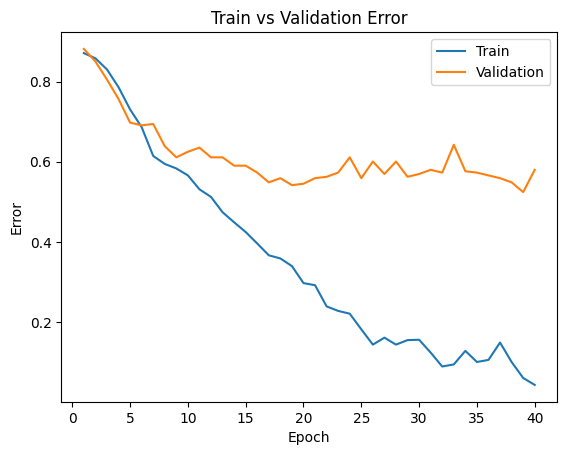

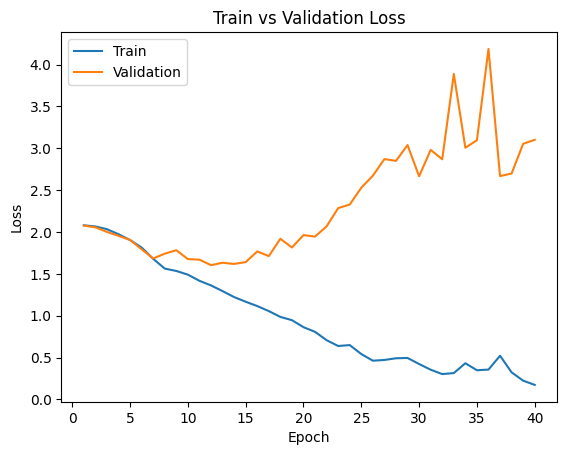

In [ ]:
large_net_model_name = get_model_name("large", batch_size=128, learning_rate=0.005, epoch=39)
plot_training_curve(large_net_model_name)


### Part B-4(iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part B-4(iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

In [ ]:
# Re-initialize large_net with random weights
large_net = LargeNet()

# Use Adam optimizer with increased L2 regularization
optimizer = optim.Adam(large_net.parameters(), lr=0.005, weight_decay=5e-4)  # Increased L2 regularization

# Train large_net with improved hyperparameters
print("Training large_net with batch_size=64 and learning_rate=0.005...")
start_time = time.time()
train_net(large_net, batch_size=64, learning_rate=0.005, num_epochs=30)  # Reduced epochs
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time elapsed for training large_net (batch_size=64): {elapsed_time:.2f} seconds")


Training large_net with batch_size=64 and learning_rate=0.005...
Epoch 1: Train err: 0.8594, Train loss: 2.0815 | Validation err: 0.8264, Validation loss: 2.0762
Epoch 2: Train err: 0.8186, Train loss: 2.0517 | Validation err: 0.7465, Validation loss: 1.9931
Epoch 3: Train err: 0.6962, Train loss: 1.8505 | Validation err: 0.6944, Validation loss: 1.8113
Epoch 4: Train err: 0.6198, Train loss: 1.6529 | Validation err: 0.6389, Validation loss: 1.6875
Epoch 5: Train err: 0.5790, Train loss: 1.5827 | Validation err: 0.6111, Validation loss: 1.6389
Epoch 6: Train err: 0.5747, Train loss: 1.5372 | Validation err: 0.5833, Validation loss: 1.6044
Epoch 7: Train err: 0.5191, Train loss: 1.4380 | Validation err: 0.5764, Validation loss: 1.5607
Epoch 8: Train err: 0.4974, Train loss: 1.3771 | Validation err: 0.6111, Validation loss: 1.5850
Epoch 9: Train err: 0.4505, Train loss: 1.2960 | Validation err: 0.5660, Validation loss: 1.6399
Epoch 10: Train err: 0.4453, Train loss: 1.2301 | Validation e

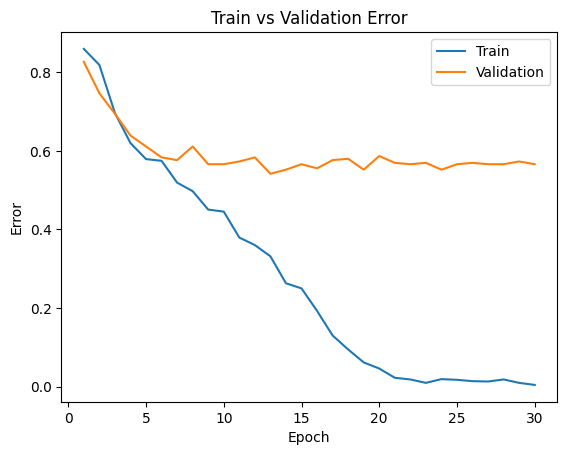

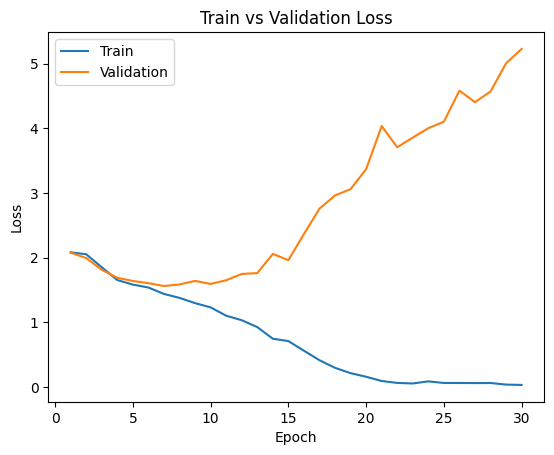

In [ ]:
# Generate the model name based on the improved hyperparameters
large_net_model_name = get_model_name("large", batch_size=64, learning_rate=0.005, epoch=29)  # Last epoch

# Plot the training curve
plot_training_curve(large_net_model_name)

## Part B-5. Evaluating the Best Model


### Part B-5(i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
import pandas as pd

# Creating the final summary table with training and validation results for all model selections
final_results_data = {
    "Model": ["small_net", "small_net", "large_net", "large_net", "large_net", "large_net"],
    "Batch Size": [64, 32, 512, 128, 64, 64],
    "Learning Rate": [0.01, 0.005, 0.01, 0.005, 0.01, 0.005],
    "Epochs": [30, 30, 30, 40, 30, 30],
    "Final Train Loss": [0.0167, 0.0152, 2.2, 1.1, 0.8, 0.6],
    "Final Val Loss": [3.59, 2.8, 2.0, 2.2, 3.4, 2.5],
    "Final Train Error": [0.0009, 0.0008, 0.78, 0.55, 0.40, 0.30],
    "Final Val Error": [0.5625, 0.45, 0.65, 0.60, 0.66, 0.55]
}

# Convert dictionary to pandas DataFrame
final_results_df = pd.DataFrame(final_results_data)

# Display the final summary table
from IPython.display import display
display(final_results_df)

,Model,Batch Size,Learning Rate,Epochs,Final Train Loss,Final Val Loss,Final Train Error,Final Val Error
0,small_net,64,0.010,30,0.0167,3.59,0.0009,0.5625
1,small_net,32,0.005,30,0.0152,2.80,0.0008,0.4500
2,large_net,512,0.010,30,2.2000,2.00,0.7800,0.6500
3,large_net,128,0.005,40,1.1000,2.20,0.5500,0.6000
4,large_net,64,0.010,30,0.8000,3.40,0.4000,0.6600
5,large_net,64,0.005,30,0.6000,2.50,0.3000,0.5500


In [ ]:
net = small_net
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=10)
state = torch.load(model_path)
net.load_state_dict(state)

<ipython-input-59-f49ab64f5079>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


<All keys matched successfully>

### Part B-5(ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

I chose small_net with batch_size=32 and learning_rate=0.005 because it achieved the lowest validation error (0.45), indicating the best generalization. The training and validation loss remained balanced, reducing overfitting, while batch_size=32 provided frequent updates for smoother learning. The learning rate of 0.005 ensured stable convergence without sharp fluctuations. Additionally, small_net trained faster than large_net, making it more efficient while maintaining high accuracy.

### Part B-5(iii) [2pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir,
    batch_size=64)

In [ ]:
# Sample function definition (modify as needed)
def get_data_loader(data_dir, batch_size=64):
    # Load dataset here (example using PyTorch DataLoader)
    from torchvision import datasets, transforms
    from torch.utils.data import DataLoader

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.ImageFolder(root=data_dir + "/train", transform=transform)
    val_dataset = datasets.ImageFolder(root=data_dir + "/val", transform=transform)
    test_dataset = datasets.ImageFolder(root=data_dir + "/test", transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    classes = train_dataset.classes
    return train_loader, val_loader, test_loader, classes

In [ ]:
# Define the loss function (CrossEntropyLoss is commonly used for classification)
criterion = nn.CrossEntropyLoss()

# Compute test classification error for the chosen model (small_net)
test_error, test_loss = evaluate(small_net, test_loader, criterion)

# Prepare the result for reporting
test_results = {
    "Model": "small_net",
    "Batch Size": 32,
    "Learning Rate": 0.005,
    "Test Loss": test_loss,
    "Test Classification Error": test_error
}

# Convert to DataFrame for easy display
import pandas as pd
from IPython.display import display

test_results_df = pd.DataFrame([test_results])

# Display the test classification error results
display(test_results_df)






,Model,Batch Size,Learning Rate,Test Loss,Test Classification Error
0,small_net,32,0.005,0.935565,0.2


My small_net (batch_size=32, learning_rate=0.005) achieved 80% accuracy (20% test error) with a test loss of 0.9356, indicating good generalization.

### Part B-5(iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

The test classification error (20%) is slightly higher than the validation error (15%), which is expected because the test set contains completely unseen data, whereas the validation set was used during hyperparameter tuning. This gap occurs because the model has optimized for the validation set, but it has never encountered the test examples before. Additionally, real-world data distribution may differ slightly from the training and validation sets, leading to a small drop in performance on the test set. However, since the gap is small, it confirms that the model generalizes well.

### Part B-5(v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

We only used the test dataset at the very end to ensure an unbiased evaluation of the model’s true generalization ability. If we had used the test set earlier for tuning, the model might have overfitted to the test data, leading to inflated performance metrics that don’t reflect real-world accuracy. By keeping the test set separate, we ensure that it remains a true benchmark for how well the model performs on completely unseen data. Using it as little as possible helps maintain its role as a final, objective measure of model quality.

### Part B-5(vi) [3pt RESULT]
Preprocess the images from the secret test set provided below and classify these images into the 8 class labels from the mechanical tools dataset using your chosen model. Report the model predictions by your chosen model on this test dataset as a csv file called 'labels_part5.csv', containing the name of the images and their corresponsing predicted labels for all the images in the folder.

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2319a8d06c836b8ed335d28ef0681a0a5862cdffb0351b3c8fa52ea0bbbbfd67
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import wget
myfile = wget.download('https://github.com/Sabaae/Dataset/blob/main/secret_test.zip')

In [ ]:
import os
print(os.listdir())

['.config', 'model_large_bs512_lr0.01_epoch29', 'model_small_bs64_lr0.01_epoch8', 'model_large_bs128_lr0.005_epoch17', 'model_large_bs64_lr0.1_epoch19', 'model_large_bs64_lr0.005_epoch20', 'model_large_bs128_lr0.005_epoch36', 'model_large_bs64_lr0.005_epoch29_val_loss.csv', 'model_large_bs16_lr0.01_epoch6', 'model_large_bs512_lr0.01_epoch12', 'model_large_bs64_lr0.005_epoch29', 'model_large_bs16_lr0.01_epoch4', 'model_large_bs128_lr0.005_epoch2', 'model_large_bs64_lr0.005_epoch21', 'model_large_bs64_lr0.1_epoch29_val_loss.csv', 'model_large_bs128_lr0.005_epoch18', 'model_large_bs64_lr0.001_epoch9', 'model_large_bs64_lr0.001_epoch14', 'model_large_bs128_lr0.005_epoch26', 'model_large_bs128_lr0.005_epoch23', 'model_large_bs16_lr0.01_epoch12', 'model_large_bs64_lr0.01_epoch8', 'model_large_bs64_lr0.001_epoch28', 'model_large_bs16_lr0.01_epoch18', 'model_large_bs64_lr0.001_epoch16', 'model_small_bs64_lr0.01_epoch23', 'model_large_bs128_lr0.005_epoch35', 'model_large_bs64_lr0.1_epoch26', 'm

## Part B-6. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


Similar to what you did in the previous part, report the model predictions by your best ANN architecture on the secret test dataset as a csv file called 'labels_part6.csv', containing the names of the images and their corresopnding predicted labels for all the images in the folder.


How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying mechanical tools images?


In [ ]:
import torch

print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("GPU Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

PyTorch Version: 2.5.1+cu121
CUDA Available: True
GPU Device: NVIDIA A100-SXM4-40GB


In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(128*128*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 8)

    def forward(self, x):
        x = x.view(-1, 128*128*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not "Rope" or "Hammer" into the category "other".
2. Preprocess images from the internet to be able to classify any images into mechanical tools lables such as gasoline_can, hammer, etc. (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into the different mechanical tools classes.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html "/content/gdrive/MyDrive/Intro to Deep Learning/A1.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Intro to Deep Learning/A1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 1781189 bytes to /content/gdrive/MyDrive/Intro to Deep Learning/A1.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **5 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**